In [27]:
import pandas as pd
import nltk
import pandas as pd
import numpy
import datetime
import pandas as pd
import time
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
import gensim
import gensim.corpora as corpora
from gensim.models import LdaMulticore
from os import path
from gensim.models import CoherenceModel
from gensim.models import ldaseqmodel
from pprint import pprint

In [1]:
my_df = pd.read_pickle("./tweets_per_weeks.pkl")

<IPython.core.display.Javascript object>

In [12]:
my_df_clean=pd.read_pickle("./clean_tweets_per_weeks.pkl")

<IPython.core.display.Javascript object>

In [13]:
data_clean = my_df_clean.tweet

In [2]:
data = my_df.tweet.values.tolist()

In [28]:
# Create Dictionary
id2word = corpora.Dictionary(data_clean)

In [243]:
vocab=sorted([id2word[i] for i in range(len(id2word))])

In [175]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]


[[('free', 1), ('health', 1), ('hockey', 1), ('stick', 1)]]

In [197]:
id2word[25]

'old'

In [174]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_clean]

In [12]:

my_df['weeks']=my_df['weeks'].replace("weeks_", "fortnight",regex=True)

In [13]:
dates= ["2019-03-31","2019-04-14","2019-04-28","2019-05-12","2019-05-26","2019-06-09","2019-06-24","2019-07-07","2019-07-21","2019-08-04","2019-08-18","2019-09-01","2019-09-15"
        ,"2019-09-29","2019-10-13","2019-10-27","2019-11-10","2019-11-24","2019-12-08","2019-12-22","2020-01-05","2020-01-19","2020-02-02","2020-02-16","2020-03-01","2020-03-15"]

In [208]:
my_df_clean=pd.read_pickle("./clean_tweets_per_weeks.pkl")

In [14]:
my_df.weeks = my_df['weeks'].replace( ['fortnight'+str(i) for i in range(1,27)],dates)

In [209]:
data_clean=list(my_df_clean.tweet)

In [210]:
print(data_clean[3:7])

[['chronic_pain', 'patient', 'give', 'one', 'important', 'meds', 'cost', 'insurance', 'insurance', 'canada', 'reminded', 'every', 'day', 'pain', 'caused', 'refusal', 'rein', 'pharmaceutical', 'companies', 'business', 'first', 'patients', 'last'], ['recap', 'torontopearson', 'security', 'connection', 'took', 'hour', 'half', 'missed', 'aircanada', 'flight', 'minutes', 'air', 'canada', 'like', 'broken', 'link', 'tell', 'travel', 'insurance'], ['true', 'story', 'talk', 'ish', 'man', 'beach', 'maui', 'heart', 'trouble', 'went', 'hospital', 'heart', 'surgery', 'fortunatly', 'travel', 'insurance', 'said', 'back', 'home', 'canada', 'would', 'dead', 'friend', 'died', 'due', 'poor', 'quality', 'care', 'heart', 'trouble', 'sent', 'home', 'die'], ['women', 'insurance', 'program_launched', 'support', 'japangov', 'canada', 'wefi_helping', 'women', 'live', 'healthier', 'productive_lives', 'invest_tomorrow']]


In [217]:
my_df['weeks'].value_counts()[my_df['weeks'].unique()]

2019-03-31    1260
2019-04-14    1209
2019-04-28    1270
2019-05-12    1024
2019-05-26    1069
2019-06-09    1098
2019-06-24    1993
2019-07-07    1380
2019-07-21    2441
2019-08-04    1781
2019-08-18    1306
2019-09-01    1654
2019-09-15    1545
2019-09-29    1696
2019-10-13    1814
2019-10-27    1622
2019-11-10    1117
2019-11-24    1244
2019-12-08    1399
2019-12-22     925
2020-01-05    1467
2020-01-19    1494
2020-02-02    2341
2020-02-16    3059
2020-03-01    3106
2020-03-15    2662
Name: weeks, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

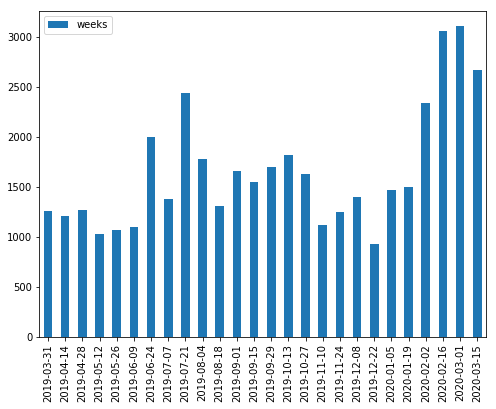

In [211]:
pd.DataFrame(my_df['weeks'].value_counts()[my_df['weeks'].unique()]).plot(kind="bar")
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)
plt.savefig('./graphs/tweets_fres_per_fortnight.jpg', bbox_inches='tight',
        transparent=True, dpi = 100)

In [213]:
all_per_year = my_df_clean.groupby('weeks').agg({'tweet': 'sum'})


In [14]:
wordcount = {}
for tweet in my_df_clean.tweet:
    for word in tweet:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
        

In [19]:
wordcount['cancellation']

63

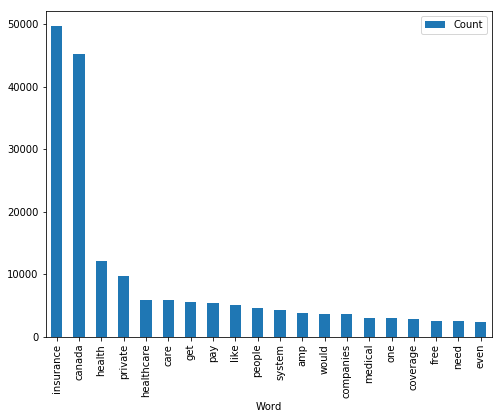

In [99]:
import collections
word_counter = collections.Counter(wordcount)
lst = word_counter.most_common(20)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)
plt.savefig('./graphs/all_tweets_freq.jpg', bbox_inches='tight',
        transparent=True, dpi = 100)

In [219]:
all_per_year['weeks']=list(all_per_year.index)


In [220]:
all_per_year

,tweet,weeks
weeks,,
2019-03-31,"[canada, stick, hockey, free, health, insuranc...",2019-03-31
2019-04-14,"[bought, insurance, company, decided, profitab...",2019-04-14
2019-04-28,"[canada, every, employee, employer, pays, empl...",2019-04-28
2019-05-12,"[javonni, understand, health, care, free, cana...",2019-05-12
2019-05-26,"[interesting, dental, care, free, canada, amp,...",2019-05-26
2019-06-09,"[good, note, started, insurance, hunt, contact...",2019-06-09
2019-06-24,"[medicareforall, article, nejm, estimates, uni...",2019-06-24
2019-07-07,"[day, team, canada, insurance, employees, frie...",2019-07-07
2019-07-21,"[students, basically, tourists, provide, docum...",2019-07-21


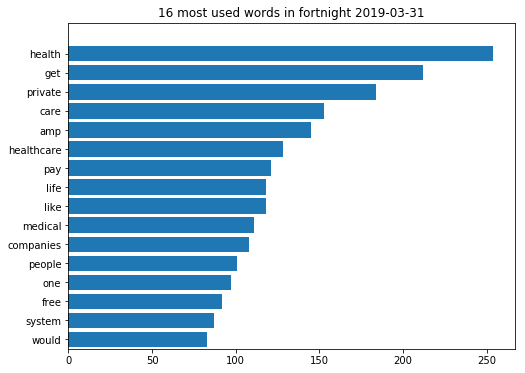

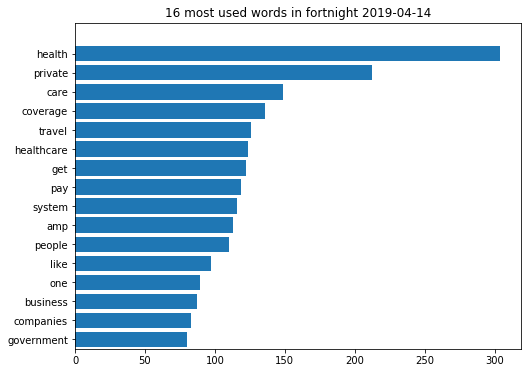

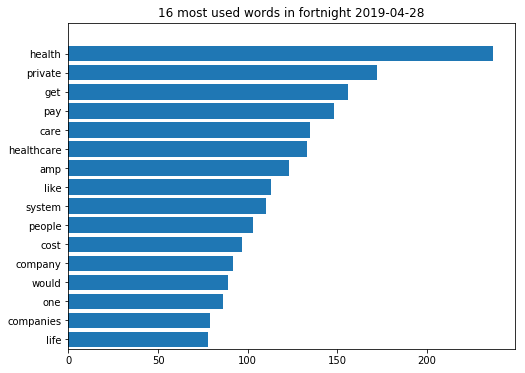

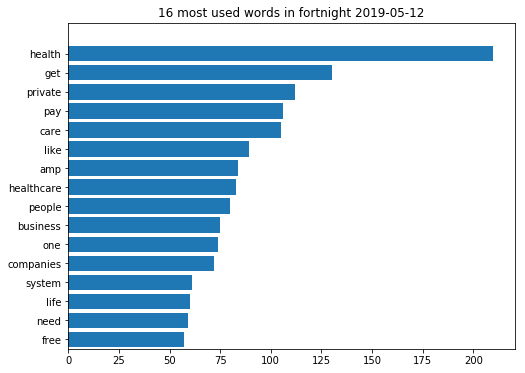

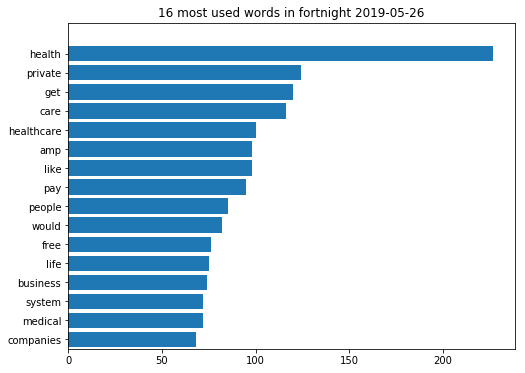

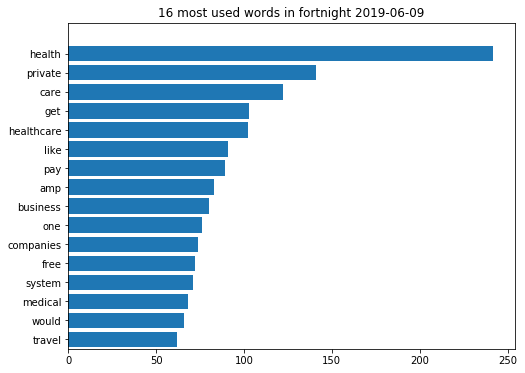

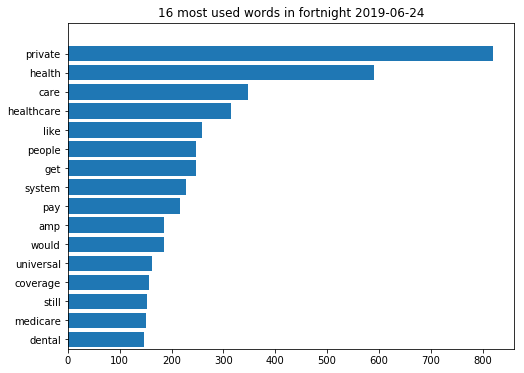

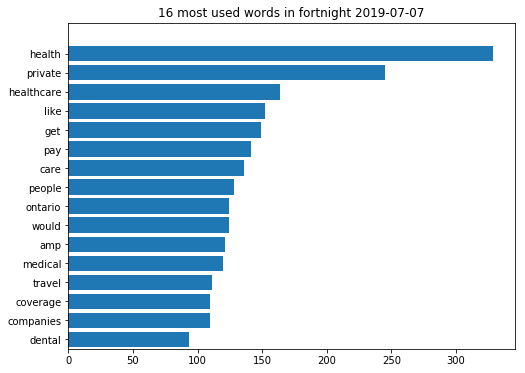

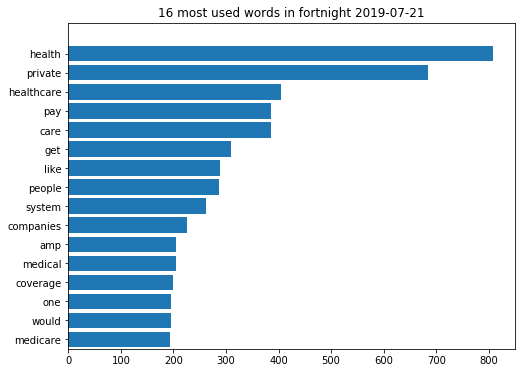

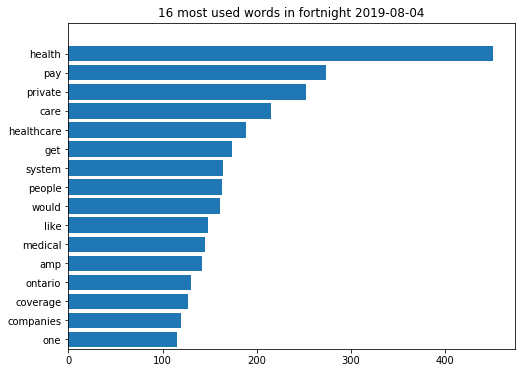

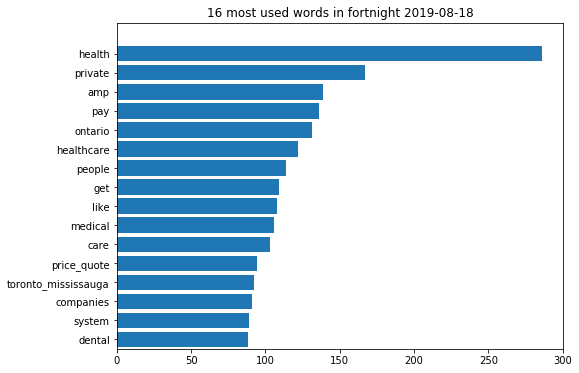

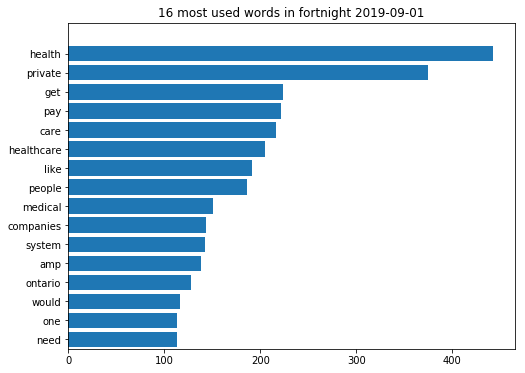

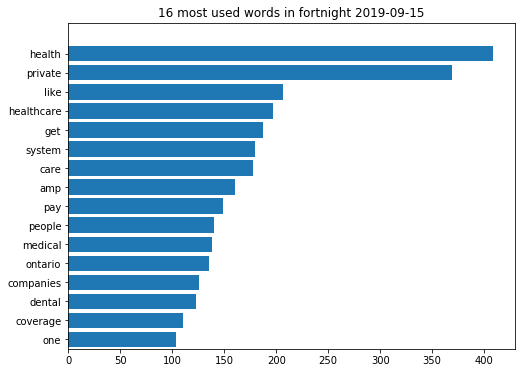

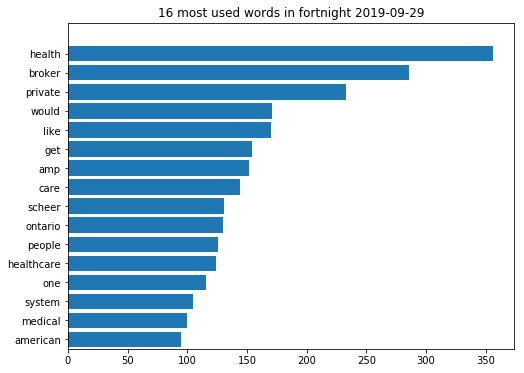

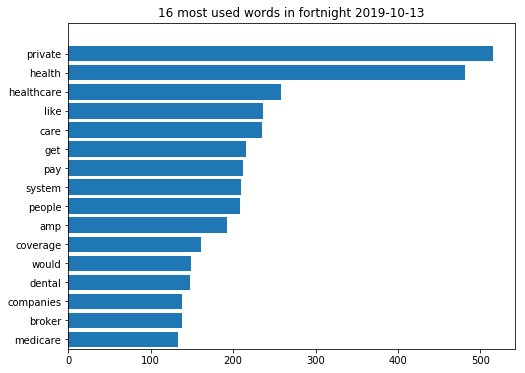

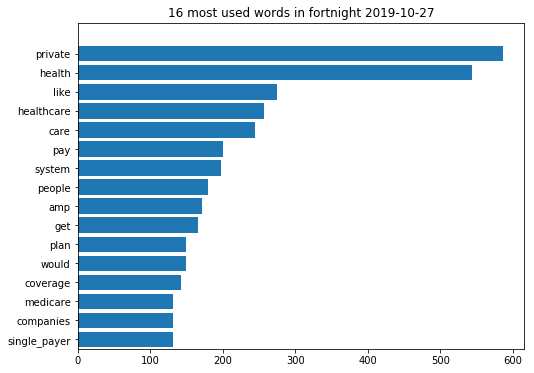

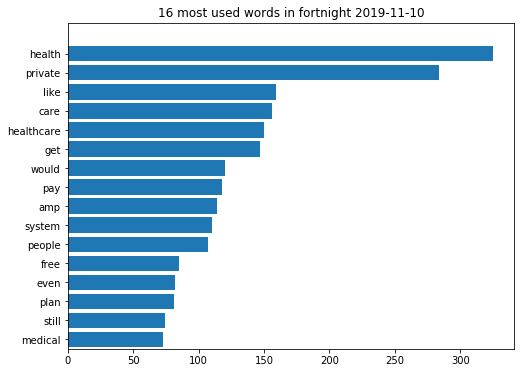

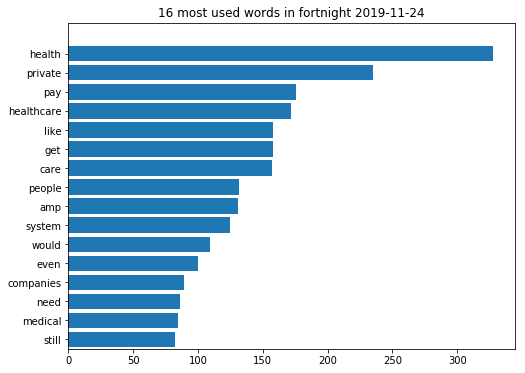

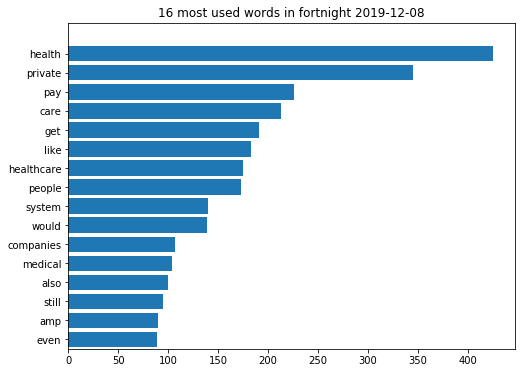

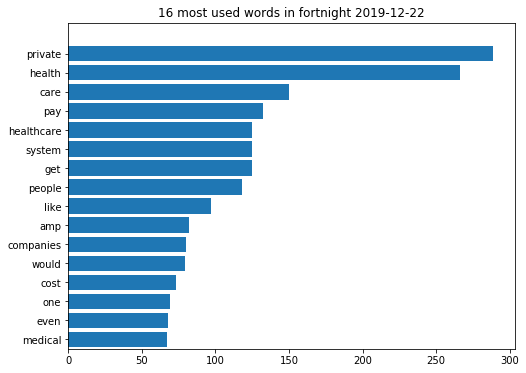

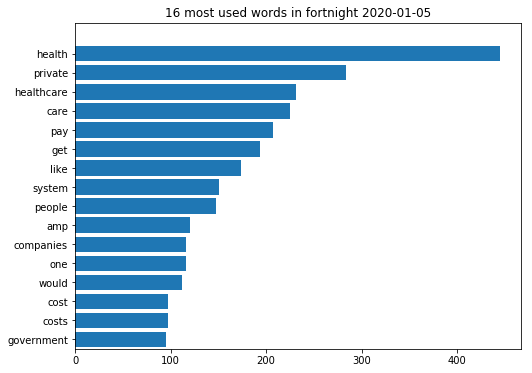

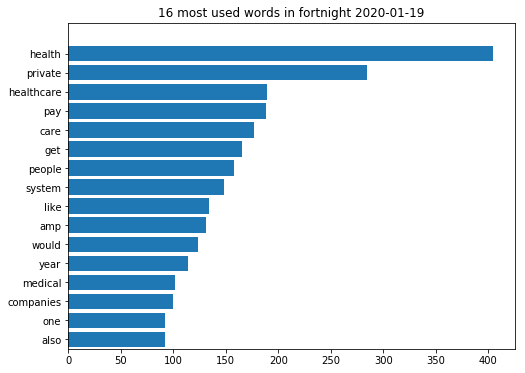

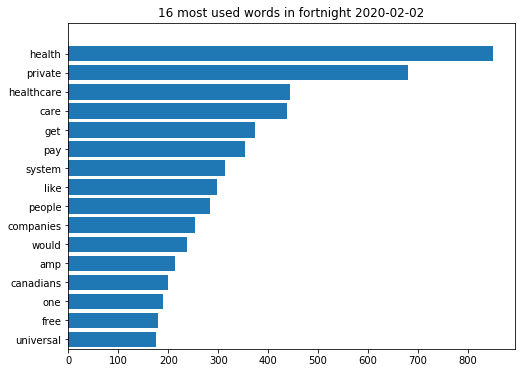

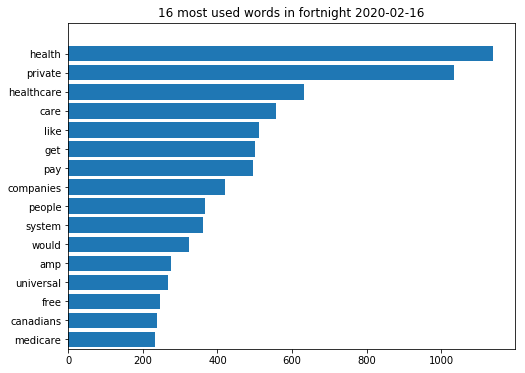

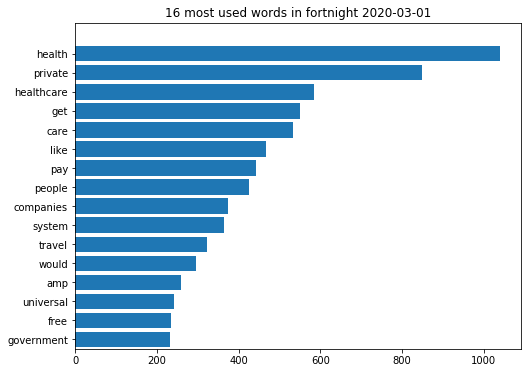

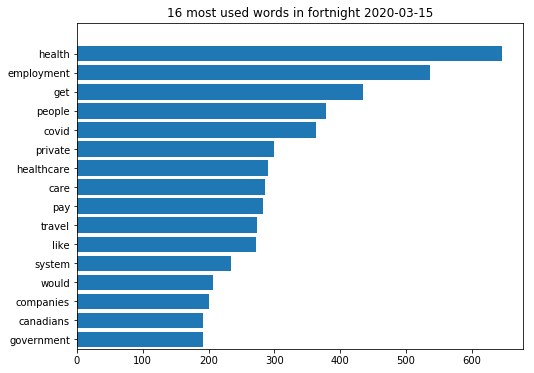

In [166]:
for i, row in all_per_year.iterrows():
    sess = dict(nltk.FreqDist(row['tweet']))
    sort_sess = sorted(sess.items(), key=lambda x: x[1], reverse=True)[0:25]
    plt.barh(range(len(sort_sess)), [val[1] for val in sort_sess][::-1], align='center')
    plt.yticks(range(len(sort_sess)), [val[0] for val in sort_sess][::-1])
    #plt.yticks(rotation=90)
    #plt.yticks(pad=15)
    plt.title("16 most used words in fortnight %s" % row['weeks'])
    plt.ylim(8.5)
    
    figure = plt.gcf() # get current figure
    figure.set_size_inches(8, 6)
    string="16 most used words in fortnight %s" % row['weeks']
    plt.savefig('./graphs/'+string, bbox_inches='tight',
            transparent=True, dpi = 100)
    plt.show()
    

In [21]:
#construire un dictionnaire contenant les frequences des mots par intervalle de temps 
sess={}
for i, row in all_per_year.iterrows():
    sess[str(i)] = dict(nltk.FreqDist(row['tweet']))
    #sort_sess = sorted(sess.items(), key=lambda x: x[1], reverse=True)[0:25]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [245]:
# construire le vecteur contenat le vocuablulaire global
vocab=pd.DataFrame(vocab,columns=['key'])


In [246]:
len(vocab)

34833

In [239]:
vocab_evol=vocab
for k, v in sess.items():
    other=pd.DataFrame(sess[k].items(),columns=['key', 'freq'+k] )

    #vocab= vocab.set_index('key').join(other.set_index('key'))
    #vocab = vocab.join(other.set_index('key'), on='key')
    vocab_evol=vocab_evol.merge(other, how='left', on='key')
        
 

In [240]:
vocab_evol = vocab_evol.fillna(0)

In [71]:
wordfreq = [(w,my_df_clean.tweet[1].count(w)) for w in my_df_clean.tweet[1]] # a list comprehension


In [206]:
wordfreq

[('yep', 1),
 ('talking', 1),
 ('care', 1),
 ('insurance', 1),
 ('also', 1),
 ('notes', 1),
 ('canada', 1),
 ('seeing', 1),
 ('similar', 1),
 ('problems', 1),
 ('despite', 1),
 ('years', 1),
 ('implementation', 1),
 ('aca', 1)]

In [230]:
#words = nltk.tokenize.word_tokenize(p)
fdist = dict(nltk.FreqDist(list_all))

In [233]:
fdist

{'stick': 37,
 'hockey': 90,
 'free': 2557,
 'health': 12044,
 'yep': 63,
 'talking': 374,
 'care': 5875,
 'also': 2407,
 'notes': 24,
 'seeing': 122,
 'similar': 414,
 'problems': 210,
 'despite': 127,
 'years': 1124,
 'implementation': 26,
 'aca': 238,
 'life': 1819,
 'broker': 761,
 'deals': 61,
 'least': 460,
 'companies': 3606,
 'resp': 8,
 'old': 270,
 'kid': 63,
 'much': 1768,
 'investment': 231,
 'experience': 362,
 'chronic_pain': 8,
 'patient': 187,
 'give': 608,
 'one': 2923,
 'important': 273,
 'meds': 537,
 'cost': 2244,
 'reminded': 10,
 'every': 1284,
 'day': 791,
 'pain': 89,
 'caused': 78,
 'refusal': 6,
 'rein': 6,
 'pharmaceutical': 185,
 'business': 1721,
 'first': 854,
 'patients': 339,
 'last': 590,
 'recap': 1,
 'torontopearson': 1,
 'security': 167,
 'connection': 10,
 'took': 252,
 'hour': 129,
 'half': 385,
 'missed': 38,
 'aircanada': 15,
 'flight': 127,
 'minutes': 78,
 'air': 166,
 'like': 5090,
 'broken': 140,
 'link': 83,
 'tell': 463,
 'travel': 2339,
 '

In [ ]:
for i, row in all_per_year.iterrows():
    sess = dict(nltk.FreqDist(row['tweet']))
    sort_sess = sorted(sess.items(), key=lambda x: x[1], reverse=True)[0:25]

In [222]:
freqs = {}
for i, speech in my_df_clean.iterrows():
    year = speech['weeks']
    for token in speech['tweet']:
        if token not in freqs:
            freqs[token] = {"total_freq":1, year:1}
        else:
            freqs[token]["total_freq"] += 1
            if not freqs[token].get(year):
                freqs[token][year] = 1
            else:
                freqs[token][year] += 1

In [238]:
sess

{'2019-03-31': {'canada': 1306,
  'stick': 3,
  'hockey': 3,
  'free': 92,
  'health': 254,
  'insurance': 1473,
  'yep': 4,
  'talking': 9,
  'care': 153,
  'also': 42,
  'notes': 3,
  'seeing': 7,
  'similar': 11,
  'problems': 3,
  'despite': 4,
  'years': 26,
  'implementation': 1,
  'aca': 15,
  'life': 118,
  'broker': 20,
  'deals': 3,
  'least': 9,
  'companies': 108,
  'resp': 1,
  'old': 8,
  'kid': 4,
  'much': 46,
  'investment': 6,
  'experience': 11,
  'chronic_pain': 1,
  'patient': 9,
  'give': 10,
  'one': 97,
  'important': 8,
  'meds': 20,
  'cost': 59,
  'reminded': 1,
  'every': 25,
  'day': 28,
  'pain': 6,
  'caused': 2,
  'refusal': 1,
  'rein': 1,
  'pharmaceutical': 8,
  'business': 62,
  'first': 24,
  'patients': 9,
  'last': 21,
  'recap': 1,
  'torontopearson': 1,
  'security': 8,
  'connection': 1,
  'took': 6,
  'hour': 5,
  'half': 6,
  'missed': 1,
  'aircanada': 1,
  'flight': 2,
  'minutes': 1,
  'air': 7,
  'like': 118,
  'broken': 4,
  'link': 2,
 

In [237]:
freqs

{'canada': {'total_freq': 45235,
  '2019-03-31': 1306,
  '2019-04-14': 1256,
  '2019-04-28': 1304,
  '2019-05-12': 1096,
  '2019-05-26': 1111,
  '2019-06-09': 1143,
  '2019-06-24': 2107,
  '2019-07-07': 1501,
  '2019-07-21': 2556,
  '2019-08-04': 1892,
  '2019-08-18': 1362,
  '2019-09-01': 1747,
  '2019-09-15': 1631,
  '2019-09-29': 1782,
  '2019-10-13': 1877,
  '2019-10-27': 1718,
  '2019-11-10': 1149,
  '2019-11-24': 1283,
  '2019-12-08': 1432,
  '2019-12-22': 979,
  '2020-01-05': 1555,
  '2020-01-19': 1568,
  '2020-02-02': 2519,
  '2020-02-16': 3248,
  '2020-03-01': 3301,
  '2020-03-15': 2812},
 'stick': {'total_freq': 37,
  '2019-03-31': 3,
  '2019-06-24': 2,
  '2019-07-07': 5,
  '2019-07-21': 2,
  '2019-08-18': 2,
  '2019-09-01': 3,
  '2019-09-15': 2,
  '2019-09-29': 2,
  '2019-11-10': 2,
  '2019-11-24': 1,
  '2019-12-08': 2,
  '2020-01-05': 1,
  '2020-02-02': 2,
  '2020-02-16': 5,
  '2020-03-01': 2,
  '2020-03-15': 1},
 'hockey': {'total_freq': 90,
  '2019-03-31': 3,
  '2019-04-1

In [224]:
freqs_df = pd.DataFrame.from_dict(freqs, orient='index')
freqs_df['word'] = freqs_df.index

In [225]:
freqs_df

,total_freq,2019-03-31,2019-04-14,2019-04-28,2019-05-12,2019-05-26,2019-06-09,2019-06-24,2019-07-07,2019-07-21,...,2019-11-24,2019-12-08,2019-12-22,2020-01-05,2020-01-19,2020-02-02,2020-02-16,2020-03-01,2020-03-15,word
aaa,5,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aaa
aaaand,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aaaand
aaalll,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,aaalll
aabs,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,aabs
aadhaar,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,aadhaar
aafc,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,aafc
aahgrad,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aahgrad
aaisa,1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aaisa
aaj,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aaj
aan,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aan


In [226]:
# Example of data for the stem of the word "peace"
freqs_df[freqs_df.index == "dental"]


,total_freq,2019-03-31,2019-04-14,2019-04-28,2019-05-12,2019-05-26,2019-06-09,2019-06-24,2019-07-07,2019-07-21,...,2019-11-24,2019-12-08,2019-12-22,2020-01-05,2020-01-19,2020-02-02,2020-02-16,2020-03-01,2020-03-15,word
dental,2051,33.0,23.0,38.0,32.0,32.0,32.0,146.0,93.0,164.0,...,36.0,50.0,40.0,38.0,34.0,90.0,161.0,135.0,49.0,dental


In [228]:
new_cols = ["total_freq", "word"] + sorted(freqs_df.columns.tolist()[1:-1])
freqs_df = freqs_df[new_cols]

freqs_df = freqs_df.sort_values('total_freq', ascending=False)

freqs_df.head()

,total_freq,word,2019-03-31,2019-04-14,2019-04-28,2019-05-12,2019-05-26,2019-06-09,2019-06-24,2019-07-07,...,2019-11-10,2019-11-24,2019-12-08,2019-12-22,2020-01-05,2020-01-19,2020-02-02,2020-02-16,2020-03-01,2020-03-15
insurance,49688,insurance,1473.0,1373.0,1403.0,1195.0,1245.0,1329.0,2342.0,1630.0,...,1296.0,1440.0,1624.0,1087.0,1701.0,1742.0,2697.0,3551.0,3557.0,2958.0
canada,45235,canada,1306.0,1256.0,1304.0,1096.0,1111.0,1143.0,2107.0,1501.0,...,1149.0,1283.0,1432.0,979.0,1555.0,1568.0,2519.0,3248.0,3301.0,2812.0
health,12044,health,254.0,304.0,237.0,210.0,227.0,242.0,591.0,329.0,...,325.0,328.0,426.0,266.0,445.0,405.0,851.0,1140.0,1040.0,646.0
private,9776,private,184.0,212.0,172.0,112.0,124.0,141.0,820.0,245.0,...,284.0,235.0,345.0,289.0,284.0,285.0,680.0,1033.0,849.0,300.0
healthcare,5896,healthcare,128.0,124.0,133.0,83.0,100.0,102.0,315.0,164.0,...,150.0,172.0,175.0,125.0,231.0,189.0,443.0,632.0,584.0,291.0


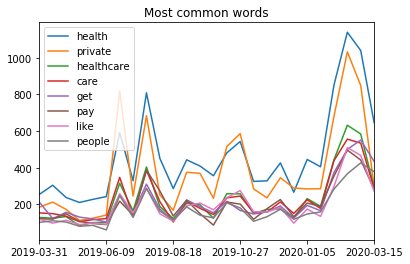

In [229]:
freqs_df.iloc[2:10, 1:47].transpose().iloc[1:].plot(title="Most common words")


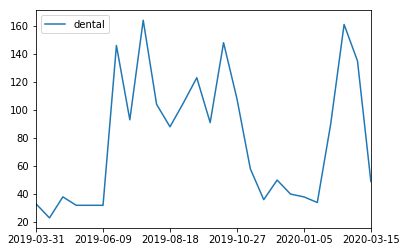

In [235]:
freqs_df[freqs_df['word'].isin(['dental'])].iloc[:,1:].transpose().iloc[1:].plot(title = "")
